In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape[0]

60000

In [4]:
X_train.shape

(60000, 28, 28)

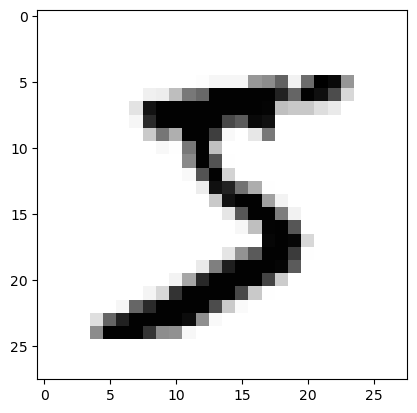

In [5]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s' % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_train = X_train.astype(float)
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 28 * 28).astype(float) / 255

X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
y_train[0]

5

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(512, input_dim=28*28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [12]:
h = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200,
             callbacks=[early_stopping])

Epoch 1/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0963 - accuracy: 0.8687 - val_loss: 0.0502 - val_accuracy: 0.9314
Epoch 2/30
225/225 [==============================] - 1s 3ms/step - loss: 0.0404 - accuracy: 0.9439 - val_loss: 0.0347 - val_accuracy: 0.9515
Epoch 3/30
225/225 [==============================] - 1s 3ms/step - loss: 0.0289 - accuracy: 0.9603 - val_loss: 0.0283 - val_accuracy: 0.9595
Epoch 4/30
225/225 [==============================] - 1s 3ms/step - loss: 0.0225 - accuracy: 0.9706 - val_loss: 0.0242 - val_accuracy: 0.9661
Epoch 5/30
225/225 [==============================] - 1s 3ms/step - loss: 0.0182 - accuracy: 0.9771 - val_loss: 0.0226 - val_accuracy: 0.9676
Epoch 6/30
225/225 [==============================] - 1s 3ms/step - loss: 0.0152 - accuracy: 0.9812 - val_loss: 0.0208 - val_accuracy: 0.9711
Epoch 7/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0129 - accuracy: 0.9846 - val_loss: 0.0191 - val_accuracy: 0.9739
Epoch 

In [13]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy : %.4f' % score[1])

313/313 [==============================] - 13s 41ms/step - loss: 0.0152 - accuracy: 0.9834
Test Accuracy : 0.9834


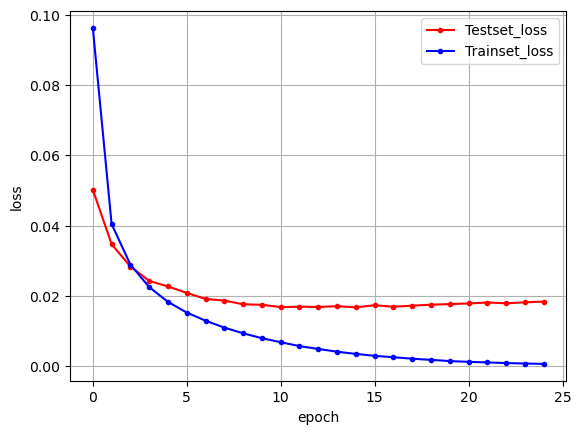

In [14]:
import matplotlib.pyplot as plt
import numpy as np

y_vloss = h.history['val_loss']
y_loss = h.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()